<h2><img src="../day1/coding hive logo med with text.png" height="60" width ="47"> Coding A Neural Network 3: Convolution Neural Network (CNN)</h2>

<h3>Step 1: Load the Libraries</h3>

In [1]:
import keras                                       # deep learning package
from keras.datasets import mnist                   # dataset we will use to train our model
from keras.layers import Dense                     # Dense describes how the layers are connected
from keras.models import Sequential                # Sequential means we are creating a sequence of connectec layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout   #CNN layers
from keras.optimizers import SGD                   # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt                    # visualize images
from keras.preprocessing import image              # preprocess images
import tensorflow as tf                            # another way to obtain the data if keras link is not working

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets
#(train_x, train_y) , (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz') #backup method
#train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
#test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<h3>Step 3: Reshape Data</h3>

In [11]:
train_x = train_x.reshape(60000,28,28,1)                
test_x = test_x.reshape(10000,28,28,1)                  
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [3]:
train_x[1].shape #view the content of one reshaped image. How is it different from before?


(28, 28)

In [5]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<h3>Step 4: Define Your Model</h3>

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=(28,28,1),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(name='flatten'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

<h3>Step 5: Compile Your Model</h3>

In [13]:
model.compile(optimizer=keras.optimizers.Adadelta(),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [14]:
history=model.fit(train_x,train_y,validation_data=(test_x, test_y),epochs=3, batch_size=128,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Instructions for updating:
Use tf.cast instead.


Train on 60000 samples, validate on 10000 samples
Epoch 1/3


  128/60000 [..............................] - ETA: 2:18 - loss: 14.0292 - acc: 0.1016

  384/60000 [..............................] - ETA: 55s - loss: 12.7693 - acc: 0.1589 

  512/60000 [..............................] - ETA: 50s - loss: 12.3632 - acc: 0.1816

  896/60000 [..............................] - ETA: 35s - loss: 11.3793 - acc: 0.2411

 1280/60000 [..............................] - ETA: 29s - loss: 10.9014 - acc: 0.2727

 1664/60000 [..............................] - ETA: 25s - loss: 10.6362 - acc: 0.2849

 2176/60000 [>.............................] - ETA: 22s - loss: 10.2176 - acc: 0.3084

 2560/60000 [>.............................] - ETA: 21s - loss: 9.9005 - acc: 0.3289 

 3072/60000 [>.............................] - ETA: 19s - loss: 9.5229 - acc: 0.3506

 3328/60000 [>.............................] - ETA: 19s - loss: 9.3742 - acc: 0.3591

 3840/60000 [>.............................] - ETA: 18s - loss: 8.9946 - acc: 0.3828

 4224/60000 [=>............................] - ETA: 17s - loss: 8.6944 - acc: 0.4018

 4608/60000 [=>............................] - ETA: 17s - loss: 8.4813 - acc: 0.4169

 4864/60000 [=>............................] - ETA: 17s - loss: 8.3090 - acc: 0.4266

 5248/60000 [=>............................] - ETA: 17s - loss: 8.1167 - acc: 0.4388

 5632/60000 [=>............................] - ETA: 16s - loss: 7.9017 - acc: 0.4531

 6016/60000 [==>...........................] - ETA: 16s - loss: 7.7228 - acc: 0.4651

 6400/60000 [==>...........................] - ETA: 16s - loss: 7.6037 - acc: 0.4736

 6784/60000 [==>...........................] - ETA: 16s - loss: 7.4805 - acc: 0.4819

 7296/60000 [==>...........................] - ETA: 15s - loss: 7.2767 - acc: 0.4951

 7552/60000 [==>...........................] - ETA: 15s - loss: 7.2244 - acc: 0.4991

 8064/60000 [===>..........................] - ETA: 15s - loss: 7.0609 - acc: 0.5092

 8448/60000 [===>..........................] - ETA: 14s - loss: 6.9387 - acc: 0.5176

 8960/60000 [===>..........................] - ETA: 14s - loss: 6.7779 - acc: 0.5289

 9216/60000 [===>..........................] - ETA: 14s - loss: 6.7251 - acc: 0.5327

 9728/60000 [===>..........................] - ETA: 14s - loss: 6.6148 - acc: 0.5401

 9856/60000 [===>..........................] - ETA: 14s - loss: 6.5862 - acc: 0.5421

10112/60000 [====>.........................] - ETA: 14s - loss: 6.5278 - acc: 0.5462

10240/60000 [====>.........................] - ETA: 14s - loss: 6.4895 - acc: 0.5484

10624/60000 [====>.........................] - ETA: 14s - loss: 6.4295 - acc: 0.5521

11136/60000 [====>.........................] - ETA: 14s - loss: 6.3508 - acc: 0.5573

11392/60000 [====>.........................] - ETA: 14s - loss: 6.2900 - acc: 0.5614

11904/60000 [====>.........................] - ETA: 13s - loss: 6.2046 - acc: 0.5667

12288/60000 [=====>........................] - ETA: 13s - loss: 6.1424 - acc: 0.5712

12672/60000 [=====>........................] - ETA: 13s - loss: 6.1038 - acc: 0.5742

13056/60000 [=====>........................] - ETA: 13s - loss: 6.0542 - acc: 0.5779

13440/60000 [=====>........................] - ETA: 13s - loss: 5.9953 - acc: 0.5821

13952/60000 [=====>........................] - ETA: 13s - loss: 5.9323 - acc: 0.5865

14336/60000 [======>.......................] - ETA: 12s - loss: 5.9014 - acc: 0.5890

14720/60000 [======>.......................] - ETA: 12s - loss: 5.8570 - acc: 0.5922

15232/60000 [======>.......................] - ETA: 12s - loss: 5.7984 - acc: 0.5962

15488/60000 [======>.......................] - ETA: 12s - loss: 5.7628 - acc: 0.5989

16000/60000 [=======>......................] - ETA: 12s - loss: 5.7282 - acc: 0.6018

16128/60000 [=======>......................] - ETA: 12s - loss: 5.7166 - acc: 0.6026

16512/60000 [=======>......................] - ETA: 12s - loss: 5.6634 - acc: 0.6062

17024/60000 [=======>......................] - ETA: 11s - loss: 5.6077 - acc: 0.6100

17408/60000 [=======>......................] - ETA: 11s - loss: 5.5721 - acc: 0.6123

17792/60000 [=======>......................] - ETA: 11s - loss: 5.5320 - acc: 0.6152

18304/60000 [========>.....................] - ETA: 11s - loss: 5.5013 - acc: 0.6177

18688/60000 [========>.....................] - ETA: 11s - loss: 5.4661 - acc: 0.6201

19072/60000 [========>.....................] - ETA: 11s - loss: 5.4349 - acc: 0.6224

19584/60000 [========>.....................] - ETA: 11s - loss: 5.3901 - acc: 0.6255

19968/60000 [========>.....................] - ETA: 10s - loss: 5.3566 - acc: 0.6277

20352/60000 [=========>....................] - ETA: 10s - loss: 5.3296 - acc: 0.6298

20736/60000 [=========>....................] - ETA: 10s - loss: 5.3039 - acc: 0.6317

21120/60000 [=========>....................] - ETA: 10s - loss: 5.2685 - acc: 0.6340

21504/60000 [=========>....................] - ETA: 10s - loss: 5.2415 - acc: 0.6362

22016/60000 [==========>...................] - ETA: 10s - loss: 5.2090 - acc: 0.6384

22400/60000 [==========>...................] - ETA: 10s - loss: 5.1834 - acc: 0.6403

22784/60000 [==========>...................] - ETA: 10s - loss: 5.1539 - acc: 0.6423

23296/60000 [==========>...................] - ETA: 9s - loss: 5.1385 - acc: 0.6434 

23680/60000 [==========>...................] - ETA: 9s - loss: 5.1173 - acc: 0.6449

24192/60000 [===========>..................] - ETA: 9s - loss: 5.0825 - acc: 0.6475

24576/60000 [===========>..................] - ETA: 9s - loss: 5.0648 - acc: 0.6489

24960/60000 [===========>..................] - ETA: 9s - loss: 5.0539 - acc: 0.6497

25344/60000 [===========>..................] - ETA: 9s - loss: 5.0369 - acc: 0.6508

25856/60000 [===========>..................] - ETA: 9s - loss: 5.0103 - acc: 0.6528

26240/60000 [============>.................] - ETA: 8s - loss: 4.9909 - acc: 0.6540

26752/60000 [============>.................] - ETA: 8s - loss: 4.9554 - acc: 0.6565

27136/60000 [============>.................] - ETA: 8s - loss: 4.9330 - acc: 0.6582

27648/60000 [============>.................] - ETA: 8s - loss: 4.8977 - acc: 0.6606

28032/60000 [=============>................] - ETA: 8s - loss: 4.8849 - acc: 0.6616

28544/60000 [=============>................] - ETA: 8s - loss: 4.8610 - acc: 0.6632

28928/60000 [=============>................] - ETA: 8s - loss: 4.8430 - acc: 0.6645

29440/60000 [=============>................] - ETA: 7s - loss: 4.8322 - acc: 0.6654

29824/60000 [=============>................] - ETA: 7s - loss: 4.8187 - acc: 0.6665

30336/60000 [==============>...............] - ETA: 7s - loss: 4.7959 - acc: 0.6682

30848/60000 [==============>...............] - ETA: 7s - loss: 4.7751 - acc: 0.6696

31232/60000 [==============>...............] - ETA: 7s - loss: 4.7645 - acc: 0.6705

31744/60000 [==============>...............] - ETA: 7s - loss: 4.7560 - acc: 0.6710

32256/60000 [===============>..............] - ETA: 7s - loss: 4.7381 - acc: 0.6723



32768/60000 [===============>..............] - ETA: 6s - loss: 4.7264 - acc: 0.6733

33152/60000 [===============>..............] - ETA: 6s - loss: 4.7137 - acc: 0.6741

33664/60000 [===============>..............] - ETA: 6s - loss: 4.6988 - acc: 0.6751

34176/60000 [================>.............] - ETA: 6s - loss: 4.6829 - acc: 0.6761

34560/60000 [================>.............] - ETA: 6s - loss: 4.6748 - acc: 0.6767

35072/60000 [================>.............] - ETA: 6s - loss: 4.6558 - acc: 0.6781

35584/60000 [================>.............] - ETA: 6s - loss: 4.6389 - acc: 0.6794

35968/60000 [================>.............] - ETA: 6s - loss: 4.6352 - acc: 0.6795

36480/60000 [=================>............] - ETA: 5s - loss: 4.6256 - acc: 0.6802

36992/60000 [=================>............] - ETA: 5s - loss: 4.6168 - acc: 0.6809

37504/60000 [=================>............] - ETA: 5s - loss: 4.6113 - acc: 0.6814

37888/60000 [=================>............] - ETA: 5s - loss: 4.6021 - acc: 0.6821

38400/60000 [==================>...........] - ETA: 5s - loss: 4.5889 - acc: 0.6832

38912/60000 [==================>...........] - ETA: 5s - loss: 4.5795 - acc: 0.6839

39424/60000 [==================>...........] - ETA: 5s - loss: 4.5638 - acc: 0.6850

39936/60000 [==================>...........] - ETA: 4s - loss: 4.5502 - acc: 0.6858

40320/60000 [===================>..........] - ETA: 4s - loss: 4.5503 - acc: 0.6860

40832/60000 [===================>..........] - ETA: 4s - loss: 4.5444 - acc: 0.6865

41344/60000 [===================>..........] - ETA: 4s - loss: 4.5358 - acc: 0.6871

41728/60000 [===================>..........] - ETA: 4s - loss: 4.5269 - acc: 0.6878

42240/60000 [====================>.........] - ETA: 4s - loss: 4.5142 - acc: 0.6886

42624/60000 [====================>.........] - ETA: 4s - loss: 4.5098 - acc: 0.6890

43136/60000 [====================>.........] - ETA: 4s - loss: 4.5014 - acc: 0.6896

43648/60000 [====================>.........] - ETA: 3s - loss: 4.4943 - acc: 0.6900

44160/60000 [=====================>........] - ETA: 3s - loss: 4.4814 - acc: 0.6909

44544/60000 [=====================>........] - ETA: 3s - loss: 4.4740 - acc: 0.6915

45056/60000 [=====================>........] - ETA: 3s - loss: 4.4666 - acc: 0.6920

45568/60000 [=====================>........] - ETA: 3s - loss: 4.4564 - acc: 0.6928

45952/60000 [=====================>........] - ETA: 3s - loss: 4.4461 - acc: 0.6934

46464/60000 [======================>.......] - ETA: 3s - loss: 4.4316 - acc: 0.6944

46976/60000 [======================>.......] - ETA: 3s - loss: 4.4234 - acc: 0.6951

47360/60000 [======================>.......] - ETA: 3s - loss: 4.4185 - acc: 0.6955

47872/60000 [======================>.......] - ETA: 2s - loss: 4.4086 - acc: 0.6962

48256/60000 [=======================>......] - ETA: 2s - loss: 4.4025 - acc: 0.6966

48768/60000 [=======================>......] - ETA: 2s - loss: 4.3928 - acc: 0.6974

49152/60000 [=======================>......] - ETA: 2s - loss: 4.3829 - acc: 0.6980

49664/60000 [=======================>......] - ETA: 2s - loss: 4.3760 - acc: 0.6985

50048/60000 [========================>.....] - ETA: 2s - loss: 4.3713 - acc: 0.6988

50560/60000 [========================>.....] - ETA: 2s - loss: 4.3612 - acc: 0.6994

51072/60000 [========================>.....] - ETA: 2s - loss: 4.3554 - acc: 0.6997

51584/60000 [========================>.....] - ETA: 2s - loss: 4.3430 - acc: 0.7005

52096/60000 [=========================>....] - ETA: 1s - loss: 4.3303 - acc: 0.7014

52480/60000 [=========================>....] - ETA: 1s - loss: 4.3231 - acc: 0.7019

52992/60000 [=========================>....] - ETA: 1s - loss: 4.3110 - acc: 0.7027

53504/60000 [=========================>....] - ETA: 1s - loss: 4.3013 - acc: 0.7034

53888/60000 [=========================>....] - ETA: 1s - loss: 4.2961 - acc: 0.7038

54400/60000 [==========================>...] - ETA: 1s - loss: 4.2879 - acc: 0.7044

54912/60000 [==========================>...] - ETA: 1s - loss: 4.2745 - acc: 0.7053

55296/60000 [==========================>...] - ETA: 1s - loss: 4.2657 - acc: 0.7057

55808/60000 [==========================>...] - ETA: 0s - loss: 4.2492 - acc: 0.7066

56192/60000 [===========================>..] - ETA: 0s - loss: 4.2364 - acc: 0.7073

56576/60000 [===========================>..] - ETA: 0s - loss: 4.2238 - acc: 0.7080

56960/60000 [===========================>..] - ETA: 0s - loss: 4.2101 - acc: 0.7088

57088/60000 [===========================>..] - ETA: 0s - loss: 4.2060 - acc: 0.7090

57472/60000 [===========================>..] - ETA: 0s - loss: 4.1935 - acc: 0.7097

57984/60000 [===========================>..] - ETA: 0s - loss: 4.1765 - acc: 0.7107

58368/60000 [============================>.] - ETA: 0s - loss: 4.1648 - acc: 0.7113

58752/60000 [============================>.] - ETA: 0s - loss: 4.1508 - acc: 0.7122

59264/60000 [============================>.] - ETA: 0s - loss: 4.1355 - acc: 0.7132

59776/60000 [============================>.] - ETA: 0s - loss: 4.1186 - acc: 0.7142

60000/60000 [==============================] - 15s 251us/step - loss: 4.1093 - acc: 0.7147 - val_loss: 2.0594 - val_acc: 0.8360


Epoch 2/3
  128/60000 [..............................] - ETA: 5s - loss: 1.5194 - acc: 0.8516

  256/60000 [..............................] - ETA: 20s - loss: 1.6814 - acc: 0.8555

  896/60000 [..............................] - ETA: 12s - loss: 1.8963 - acc: 0.8482

 1280/60000 [..............................] - ETA: 13s - loss: 2.0689 - acc: 0.8375

 1664/60000 [..............................] - ETA: 13s - loss: 2.0510 - acc: 0.8359

 2176/60000 [>.............................] - ETA: 12s - loss: 2.0452 - acc: 0.8392

 2560/60000 [>.............................] - ETA: 13s - loss: 2.0529 - acc: 0.8414

 3072/60000 [>.............................] - ETA: 12s - loss: 2.0206 - acc: 0.8457

 3584/60000 [>.............................] - ETA: 12s - loss: 2.0770 - acc: 0.8435

 3968/60000 [>.............................] - ETA: 12s - loss: 2.0375 - acc: 0.8455

 4480/60000 [=>............................] - ETA: 12s - loss: 2.0266 - acc: 0.8453

 4864/60000 [=>............................] - ETA: 12s - loss: 2.0892 - acc: 0.8417

 5376/60000 [=>............................] - ETA: 12s - loss: 2.0563 - acc: 0.8436

 5888/60000 [=>............................] - ETA: 11s - loss: 2.0530 - acc: 0.8444

 6400/60000 [==>...........................] - ETA: 11s - loss: 2.0279 - acc: 0.8458

 6784/60000 [==>...........................] - ETA: 11s - loss: 2.0020 - acc: 0.8474

 7296/60000 [==>...........................] - ETA: 11s - loss: 2.0109 - acc: 0.8461

 7808/60000 [==>...........................] - ETA: 11s - loss: 1.9738 - acc: 0.8485

 8192/60000 [===>..........................] - ETA: 11s - loss: 1.9606 - acc: 0.8497

 8704/60000 [===>..........................] - ETA: 11s - loss: 1.9669 - acc: 0.8490

 9088/60000 [===>..........................] - ETA: 11s - loss: 1.9472 - acc: 0.8505

 9600/60000 [===>..........................] - ETA: 10s - loss: 1.9406 - acc: 0.8512

10112/60000 [====>.........................] - ETA: 10s - loss: 1.9445 - acc: 0.8513

10496/60000 [====>.........................] - ETA: 10s - loss: 1.9262 - acc: 0.8529

11008/60000 [====>.........................] - ETA: 10s - loss: 1.9386 - acc: 0.8521

11392/60000 [====>.........................] - ETA: 10s - loss: 1.9296 - acc: 0.8527

11904/60000 [====>.........................] - ETA: 10s - loss: 1.9345 - acc: 0.8524

12416/60000 [=====>........................] - ETA: 10s - loss: 1.9290 - acc: 0.8525

12928/60000 [=====>........................] - ETA: 10s - loss: 1.9167 - acc: 0.8533

13312/60000 [=====>........................] - ETA: 10s - loss: 1.9153 - acc: 0.8534

13696/60000 [=====>........................] - ETA: 10s - loss: 1.9196 - acc: 0.8533

14208/60000 [======>.......................] - ETA: 9s - loss: 1.9157 - acc: 0.8541 

14592/60000 [======>.......................] - ETA: 9s - loss: 1.9014 - acc: 0.8553

15104/60000 [======>.......................] - ETA: 9s - loss: 1.8875 - acc: 0.8562

15616/60000 [======>.......................] - ETA: 9s - loss: 1.8898 - acc: 0.8558

16128/60000 [=======>......................] - ETA: 9s - loss: 1.8992 - acc: 0.8553

16512/60000 [=======>......................] - ETA: 9s - loss: 1.9009 - acc: 0.8554

17024/60000 [=======>......................] - ETA: 9s - loss: 1.8992 - acc: 0.8556

17536/60000 [=======>......................] - ETA: 9s - loss: 1.8934 - acc: 0.8556

18048/60000 [========>.....................] - ETA: 9s - loss: 1.8938 - acc: 0.8556

18432/60000 [========>.....................] - ETA: 8s - loss: 1.8923 - acc: 0.8557

18944/60000 [========>.....................] - ETA: 8s - loss: 1.9006 - acc: 0.8549

19456/60000 [========>.....................] - ETA: 8s - loss: 1.8944 - acc: 0.8553

19968/60000 [========>.....................] - ETA: 8s - loss: 1.8893 - acc: 0.8557

20480/60000 [=========>....................] - ETA: 8s - loss: 1.8775 - acc: 0.8563

20864/60000 [=========>....................] - ETA: 8s - loss: 1.8760 - acc: 0.8565

21376/60000 [=========>....................] - ETA: 8s - loss: 1.8756 - acc: 0.8563

21888/60000 [=========>....................] - ETA: 8s - loss: 1.8728 - acc: 0.8565

22400/60000 [==========>...................] - ETA: 8s - loss: 1.8533 - acc: 0.8567

22912/60000 [==========>...................] - ETA: 7s - loss: 1.8298 - acc: 0.8576

23296/60000 [==========>...................] - ETA: 7s - loss: 1.8152 - acc: 0.8579

23808/60000 [==========>...................] - ETA: 7s - loss: 1.7889 - acc: 0.8590

24320/60000 [===========>..................] - ETA: 7s - loss: 1.7613 - acc: 0.8603

24704/60000 [===========>..................] - ETA: 7s - loss: 1.7445 - acc: 0.8610

25216/60000 [===========>..................] - ETA: 7s - loss: 1.7233 - acc: 0.8618

25728/60000 [===========>..................] - ETA: 7s - loss: 1.7000 - acc: 0.8627

26240/60000 [============>.................] - ETA: 7s - loss: 1.6779 - acc: 0.8638

26752/60000 [============>.................] - ETA: 7s - loss: 1.6547 - acc: 0.8648

27136/60000 [============>.................] - ETA: 7s - loss: 1.6374 - acc: 0.8658

27648/60000 [============>.................] - ETA: 6s - loss: 1.6132 - acc: 0.8674

28032/60000 [=============>................] - ETA: 6s - loss: 1.5977 - acc: 0.8682

28544/60000 [=============>................] - ETA: 6s - loss: 1.5784 - acc: 0.8691

29056/60000 [=============>................] - ETA: 6s - loss: 1.5588 - acc: 0.8702

29568/60000 [=============>................] - ETA: 6s - loss: 1.5402 - acc: 0.8711

30080/60000 [==============>...............] - ETA: 6s - loss: 1.5227 - acc: 0.8719

30464/60000 [==============>...............] - ETA: 6s - loss: 1.5071 - acc: 0.8729

30976/60000 [==============>...............] - ETA: 6s - loss: 1.4867 - acc: 0.8743

31360/60000 [==============>...............] - ETA: 6s - loss: 1.4745 - acc: 0.8748

31744/60000 [==============>...............] - ETA: 6s - loss: 1.4635 - acc: 0.8753

32256/60000 [===============>..............] - ETA: 5s - loss: 1.4456 - acc: 0.8761

32640/60000 [===============>..............] - ETA: 5s - loss: 1.4350 - acc: 0.8767

33152/60000 [===============>..............] - ETA: 5s - loss: 1.4189 - acc: 0.8777

33664/60000 [===============>..............] - ETA: 5s - loss: 1.4026 - acc: 0.8788

34048/60000 [================>.............] - ETA: 5s - loss: 1.3904 - acc: 0.8795

34560/60000 [================>.............] - ETA: 5s - loss: 1.3751 - acc: 0.8804

34944/60000 [================>.............] - ETA: 5s - loss: 1.3648 - acc: 0.8809

35456/60000 [================>.............] - ETA: 5s - loss: 1.3491 - acc: 0.8819

35840/60000 [================>.............] - ETA: 5s - loss: 1.3391 - acc: 0.8823

36224/60000 [=================>............] - ETA: 5s - loss: 1.3287 - acc: 0.8829

36736/60000 [=================>............] - ETA: 4s - loss: 1.3150 - acc: 0.8837

37120/60000 [=================>............] - ETA: 4s - loss: 1.3043 - acc: 0.8844

37632/60000 [=================>............] - ETA: 4s - loss: 1.2901 - acc: 0.8854

38144/60000 [==================>...........] - ETA: 4s - loss: 1.2775 - acc: 0.8861

38528/60000 [==================>...........] - ETA: 4s - loss: 1.2678 - acc: 0.8867

39040/60000 [==================>...........] - ETA: 4s - loss: 1.2562 - acc: 0.8873

39552/60000 [==================>...........] - ETA: 4s - loss: 1.2432 - acc: 0.8882

40064/60000 [===================>..........] - ETA: 4s - loss: 1.2306 - acc: 0.8889

40448/60000 [===================>..........] - ETA: 4s - loss: 1.2225 - acc: 0.8893

40960/60000 [===================>..........] - ETA: 4s - loss: 1.2121 - acc: 0.8899

41472/60000 [===================>..........] - ETA: 3s - loss: 1.2006 - acc: 0.8907

41984/60000 [===================>..........] - ETA: 3s - loss: 1.1891 - acc: 0.8914

42368/60000 [====================>.........] - ETA: 3s - loss: 1.1810 - acc: 0.8919

42880/60000 [====================>.........] - ETA: 3s - loss: 1.1699 - acc: 0.8924

43264/60000 [====================>.........] - ETA: 3s - loss: 1.1637 - acc: 0.8927

43776/60000 [====================>.........] - ETA: 3s - loss: 1.1536 - acc: 0.8933

44288/60000 [=====================>........] - ETA: 3s - loss: 1.1430 - acc: 0.8940

44800/60000 [=====================>........] - ETA: 3s - loss: 1.1333 - acc: 0.8944

45184/60000 [=====================>........] - ETA: 3s - loss: 1.1264 - acc: 0.8948

45696/60000 [=====================>........] - ETA: 3s - loss: 1.1176 - acc: 0.8952

46080/60000 [======================>.......] - ETA: 2s - loss: 1.1112 - acc: 0.8956

46592/60000 [======================>.......] - ETA: 2s - loss: 1.1030 - acc: 0.8960

47104/60000 [======================>.......] - ETA: 2s - loss: 1.0936 - acc: 0.8966

47360/60000 [======================>.......] - ETA: 2s - loss: 1.0896 - acc: 0.8969

47616/60000 [======================>.......] - ETA: 2s - loss: 1.0847 - acc: 0.8972

48128/60000 [=======================>......] - ETA: 2s - loss: 1.0767 - acc: 0.8978

48640/60000 [=======================>......] - ETA: 2s - loss: 1.0675 - acc: 0.8984

49152/60000 [=======================>......] - ETA: 2s - loss: 1.0581 - acc: 0.8990

49536/60000 [=======================>......] - ETA: 2s - loss: 1.0522 - acc: 0.8992

50048/60000 [========================>.....] - ETA: 2s - loss: 1.0445 - acc: 0.8997

50560/60000 [========================>.....] - ETA: 2s - loss: 1.0361 - acc: 0.9002

50944/60000 [========================>.....] - ETA: 1s - loss: 1.0295 - acc: 0.9007

51456/60000 [========================>.....] - ETA: 1s - loss: 1.0243 - acc: 0.9010

51968/60000 [========================>.....] - ETA: 1s - loss: 1.0159 - acc: 0.9015

52480/60000 [=========================>....] - ETA: 1s - loss: 1.0082 - acc: 0.9020

52992/60000 [=========================>....] - ETA: 1s - loss: 1.0005 - acc: 0.9025

53376/60000 [=========================>....] - ETA: 1s - loss: 0.9953 - acc: 0.9029

53888/60000 [=========================>....] - ETA: 1s - loss: 0.9882 - acc: 0.9034

54400/60000 [==========================>...] - ETA: 1s - loss: 0.9812 - acc: 0.9038

54912/60000 [==========================>...] - ETA: 1s - loss: 0.9745 - acc: 0.9042

55296/60000 [==========================>...] - ETA: 1s - loss: 0.9701 - acc: 0.9044

55808/60000 [==========================>...] - ETA: 0s - loss: 0.9651 - acc: 0.9047

56192/60000 [===========================>..] - ETA: 0s - loss: 0.9599 - acc: 0.9050

56704/60000 [===========================>..] - ETA: 0s - loss: 0.9529 - acc: 0.9055

57216/60000 [===========================>..] - ETA: 0s - loss: 0.9468 - acc: 0.9059

57600/60000 [===========================>..] - ETA: 0s - loss: 0.9422 - acc: 0.9062

58112/60000 [============================>.] - ETA: 0s - loss: 0.9354 - acc: 0.9067

58624/60000 [============================>.] - ETA: 0s - loss: 0.9293 - acc: 0.9071

59008/60000 [============================>.] - ETA: 0s - loss: 0.9251 - acc: 0.9073

59520/60000 [============================>.] - ETA: 0s - loss: 0.9196 - acc: 0.9076

59904/60000 [============================>.] - ETA: 0s - loss: 0.9151 - acc: 0.9079

60000/60000 [==============================] - 14s 229us/step - loss: 0.9139 - acc: 0.9080 - val_loss: 0.2158 - val_acc: 0.9509


Epoch 3/3
  128/60000 [..............................] - ETA: 31s - loss: 0.0333 - acc: 0.9922

  640/60000 [..............................] - ETA: 15s - loss: 0.1779 - acc: 0.9688

 1024/60000 [..............................] - ETA: 15s - loss: 0.1962 - acc: 0.9619

 1536/60000 [..............................] - ETA: 13s - loss: 0.1893 - acc: 0.9622

 1920/60000 [..............................] - ETA: 14s - loss: 0.1973 - acc: 0.9589

 2432/60000 [>.............................] - ETA: 13s - loss: 0.1850 - acc: 0.9613

 2816/60000 [>.............................] - ETA: 13s - loss: 0.2067 - acc: 0.9585

 3328/60000 [>.............................] - ETA: 13s - loss: 0.2126 - acc: 0.9549

 3712/60000 [>.............................] - ETA: 13s - loss: 0.2130 - acc: 0.9558

 4096/60000 [=>............................] - ETA: 13s - loss: 0.2219 - acc: 0.9536

 4608/60000 [=>............................] - ETA: 12s - loss: 0.2289 - acc: 0.9531

 5120/60000 [=>............................] - ETA: 12s - loss: 0.2320 - acc: 0.9525

 5632/60000 [=>............................] - ETA: 12s - loss: 0.2251 - acc: 0.9533

 6016/60000 [==>...........................] - ETA: 12s - loss: 0.2246 - acc: 0.9526

 6528/60000 [==>...........................] - ETA: 11s - loss: 0.2302 - acc: 0.9514

 6912/60000 [==>...........................] - ETA: 11s - loss: 0.2266 - acc: 0.9524

 7424/60000 [==>...........................] - ETA: 11s - loss: 0.2197 - acc: 0.9538

 7808/60000 [==>...........................] - ETA: 11s - loss: 0.2181 - acc: 0.9545

 8320/60000 [===>..........................] - ETA: 11s - loss: 0.2187 - acc: 0.9540

 8704/60000 [===>..........................] - ETA: 11s - loss: 0.2187 - acc: 0.9538

 9088/60000 [===>..........................] - ETA: 11s - loss: 0.2152 - acc: 0.9547

 9600/60000 [===>..........................] - ETA: 11s - loss: 0.2191 - acc: 0.9544

 9984/60000 [===>..........................] - ETA: 11s - loss: 0.2173 - acc: 0.9543

10496/60000 [====>.........................] - ETA: 11s - loss: 0.2148 - acc: 0.9546

10880/60000 [====>.........................] - ETA: 11s - loss: 0.2156 - acc: 0.9543

11392/60000 [====>.........................] - ETA: 10s - loss: 0.2124 - acc: 0.9548

11776/60000 [====>.........................] - ETA: 10s - loss: 0.2093 - acc: 0.9555

12160/60000 [=====>........................] - ETA: 10s - loss: 0.2077 - acc: 0.9557

12288/60000 [=====>........................] - ETA: 10s - loss: 0.2066 - acc: 0.9556

12544/60000 [=====>........................] - ETA: 10s - loss: 0.2077 - acc: 0.9556

12928/60000 [=====>........................] - ETA: 10s - loss: 0.2078 - acc: 0.9555

13056/60000 [=====>........................] - ETA: 10s - loss: 0.2071 - acc: 0.9557

13440/60000 [=====>........................] - ETA: 10s - loss: 0.2084 - acc: 0.9555

13952/60000 [=====>........................] - ETA: 10s - loss: 0.2058 - acc: 0.9563

14336/60000 [======>.......................] - ETA: 10s - loss: 0.2044 - acc: 0.9565

14848/60000 [======>.......................] - ETA: 10s - loss: 0.2036 - acc: 0.9562

15232/60000 [======>.......................] - ETA: 10s - loss: 0.2030 - acc: 0.9562

15616/60000 [======>.......................] - ETA: 9s - loss: 0.2008 - acc: 0.9563 

15744/60000 [======>.......................] - ETA: 10s - loss: 0.1998 - acc: 0.9564

16128/60000 [=======>......................] - ETA: 9s - loss: 0.2003 - acc: 0.9559 

16640/60000 [=======>......................] - ETA: 9s - loss: 0.2004 - acc: 0.9559

17024/60000 [=======>......................] - ETA: 9s - loss: 0.1978 - acc: 0.9564

17536/60000 [=======>......................] - ETA: 9s - loss: 0.1989 - acc: 0.9563

17920/60000 [=======>......................] - ETA: 9s - loss: 0.1978 - acc: 0.9565

18432/60000 [========>.....................] - ETA: 9s - loss: 0.1983 - acc: 0.9565

18816/60000 [========>.....................] - ETA: 9s - loss: 0.1989 - acc: 0.9564

19200/60000 [========>.....................] - ETA: 9s - loss: 0.1998 - acc: 0.9564

19712/60000 [========>.....................] - ETA: 9s - loss: 0.1993 - acc: 0.9565

20096/60000 [=========>....................] - ETA: 9s - loss: 0.2000 - acc: 0.9565

20608/60000 [=========>....................] - ETA: 8s - loss: 0.1997 - acc: 0.9563

20992/60000 [=========>....................] - ETA: 8s - loss: 0.1981 - acc: 0.9566

21504/60000 [=========>....................] - ETA: 8s - loss: 0.1968 - acc: 0.9567

21888/60000 [=========>....................] - ETA: 8s - loss: 0.1958 - acc: 0.9568

22400/60000 [==========>...................] - ETA: 8s - loss: 0.1962 - acc: 0.9567

22912/60000 [==========>...................] - ETA: 8s - loss: 0.1961 - acc: 0.9570

23296/60000 [==========>...................] - ETA: 8s - loss: 0.1963 - acc: 0.9568

23808/60000 [==========>...................] - ETA: 8s - loss: 0.1957 - acc: 0.9568

24320/60000 [===========>..................] - ETA: 8s - loss: 0.1973 - acc: 0.9565

24704/60000 [===========>..................] - ETA: 7s - loss: 0.1977 - acc: 0.9565

25216/60000 [===========>..................] - ETA: 7s - loss: 0.1985 - acc: 0.9563

25728/60000 [===========>..................] - ETA: 7s - loss: 0.2006 - acc: 0.9558

26240/60000 [============>.................] - ETA: 7s - loss: 0.2013 - acc: 0.9558

26624/60000 [============>.................] - ETA: 7s - loss: 0.2027 - acc: 0.9558

27136/60000 [============>.................] - ETA: 7s - loss: 0.2023 - acc: 0.9557

27648/60000 [============>.................] - ETA: 7s - loss: 0.2016 - acc: 0.9557

28032/60000 [=============>................] - ETA: 7s - loss: 0.2014 - acc: 0.9558

28544/60000 [=============>................] - ETA: 7s - loss: 0.2003 - acc: 0.9559

29056/60000 [=============>................] - ETA: 6s - loss: 0.1987 - acc: 0.9561

29568/60000 [=============>................] - ETA: 6s - loss: 0.1985 - acc: 0.9561

29952/60000 [=============>................] - ETA: 6s - loss: 0.1977 - acc: 0.9562

30464/60000 [==============>...............] - ETA: 6s - loss: 0.1968 - acc: 0.9563

30976/60000 [==============>...............] - ETA: 6s - loss: 0.1952 - acc: 0.9566

31488/60000 [==============>...............] - ETA: 6s - loss: 0.1941 - acc: 0.9566

32000/60000 [===============>..............] - ETA: 6s - loss: 0.1928 - acc: 0.9567

32512/60000 [===============>..............] - ETA: 6s - loss: 0.1925 - acc: 0.9568

32896/60000 [===============>..............] - ETA: 5s - loss: 0.1927 - acc: 0.9567

33408/60000 [===============>..............] - ETA: 5s - loss: 0.1915 - acc: 0.9569

33920/60000 [===============>..............] - ETA: 5s - loss: 0.1921 - acc: 0.9568

34304/60000 [================>.............] - ETA: 5s - loss: 0.1925 - acc: 0.9566

34688/60000 [================>.............] - ETA: 5s - loss: 0.1929 - acc: 0.9566

35200/60000 [================>.............] - ETA: 5s - loss: 0.1920 - acc: 0.9567

35584/60000 [================>.............] - ETA: 5s - loss: 0.1919 - acc: 0.9566

35968/60000 [================>.............] - ETA: 5s - loss: 0.1917 - acc: 0.9567

36480/60000 [=================>............] - ETA: 5s - loss: 0.1904 - acc: 0.9568

36864/60000 [=================>............] - ETA: 5s - loss: 0.1912 - acc: 0.9568

37376/60000 [=================>............] - ETA: 5s - loss: 0.1911 - acc: 0.9567

37888/60000 [=================>............] - ETA: 4s - loss: 0.1898 - acc: 0.9570

38272/60000 [==================>...........] - ETA: 4s - loss: 0.1895 - acc: 0.9571

38656/60000 [==================>...........] - ETA: 4s - loss: 0.1892 - acc: 0.9571

39168/60000 [==================>...........] - ETA: 4s - loss: 0.1885 - acc: 0.9571

39552/60000 [==================>...........] - ETA: 4s - loss: 0.1881 - acc: 0.9571

40064/60000 [===================>..........] - ETA: 4s - loss: 0.1873 - acc: 0.9572

40448/60000 [===================>..........] - ETA: 4s - loss: 0.1881 - acc: 0.9572

40960/60000 [===================>..........] - ETA: 4s - loss: 0.1887 - acc: 0.9572

41344/60000 [===================>..........] - ETA: 4s - loss: 0.1879 - acc: 0.9572

41728/60000 [===================>..........] - ETA: 4s - loss: 0.1885 - acc: 0.9570

42112/60000 [====================>.........] - ETA: 3s - loss: 0.1879 - acc: 0.9571

42368/60000 [====================>.........] - ETA: 3s - loss: 0.1875 - acc: 0.9572

42752/60000 [====================>.........] - ETA: 3s - loss: 0.1864 - acc: 0.9574

43008/60000 [====================>.........] - ETA: 3s - loss: 0.1860 - acc: 0.9574

43392/60000 [====================>.........] - ETA: 3s - loss: 0.1852 - acc: 0.9575

43520/60000 [====================>.........] - ETA: 3s - loss: 0.1851 - acc: 0.9576

43904/60000 [====================>.........] - ETA: 3s - loss: 0.1852 - acc: 0.9575

44288/60000 [=====================>........] - ETA: 3s - loss: 0.1849 - acc: 0.9575

44416/60000 [=====================>........] - ETA: 3s - loss: 0.1847 - acc: 0.9576

44800/60000 [=====================>........] - ETA: 3s - loss: 0.1847 - acc: 0.9574

44928/60000 [=====================>........] - ETA: 3s - loss: 0.1844 - acc: 0.9574

45312/60000 [=====================>........] - ETA: 3s - loss: 0.1853 - acc: 0.9574

45696/60000 [=====================>........] - ETA: 3s - loss: 0.1846 - acc: 0.9576

46080/60000 [======================>.......] - ETA: 3s - loss: 0.1842 - acc: 0.9577

46208/60000 [======================>.......] - ETA: 3s - loss: 0.1842 - acc: 0.9578

46720/60000 [======================>.......] - ETA: 2s - loss: 0.1846 - acc: 0.9577

47104/60000 [======================>.......] - ETA: 2s - loss: 0.1850 - acc: 0.9575

47616/60000 [======================>.......] - ETA: 2s - loss: 0.1860 - acc: 0.9573

48128/60000 [=======================>......] - ETA: 2s - loss: 0.1856 - acc: 0.9575

48640/60000 [=======================>......] - ETA: 2s - loss: 0.1844 - acc: 0.9577

49024/60000 [=======================>......] - ETA: 2s - loss: 0.1844 - acc: 0.9577

49536/60000 [=======================>......] - ETA: 2s - loss: 0.1835 - acc: 0.9578

50048/60000 [========================>.....] - ETA: 2s - loss: 0.1825 - acc: 0.9580

50432/60000 [========================>.....] - ETA: 2s - loss: 0.1820 - acc: 0.9580

50944/60000 [========================>.....] - ETA: 2s - loss: 0.1818 - acc: 0.9581

51328/60000 [========================>.....] - ETA: 1s - loss: 0.1816 - acc: 0.9582

51840/60000 [========================>.....] - ETA: 1s - loss: 0.1813 - acc: 0.9582

52352/60000 [=========================>....] - ETA: 1s - loss: 0.1809 - acc: 0.9583

52864/60000 [=========================>....] - ETA: 1s - loss: 0.1804 - acc: 0.9584

53248/60000 [=========================>....] - ETA: 1s - loss: 0.1798 - acc: 0.9585

53760/60000 [=========================>....] - ETA: 1s - loss: 0.1793 - acc: 0.9586

54272/60000 [==========================>...] - ETA: 1s - loss: 0.1789 - acc: 0.9588

54656/60000 [==========================>...] - ETA: 1s - loss: 0.1794 - acc: 0.9587

55168/60000 [==========================>...] - ETA: 1s - loss: 0.1803 - acc: 0.9586

55680/60000 [==========================>...] - ETA: 0s - loss: 0.1800 - acc: 0.9586

56192/60000 [===========================>..] - ETA: 0s - loss: 0.1798 - acc: 0.9586

56704/60000 [===========================>..] - ETA: 0s - loss: 0.1800 - acc: 0.9585

57216/60000 [===========================>..] - ETA: 0s - loss: 0.1795 - acc: 0.9586

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1793 - acc: 0.9586

58112/60000 [============================>.] - ETA: 0s - loss: 0.1789 - acc: 0.9587

58496/60000 [============================>.] - ETA: 0s - loss: 0.1793 - acc: 0.9586

58624/60000 [============================>.] - ETA: 0s - loss: 0.1791 - acc: 0.9586

59008/60000 [============================>.] - ETA: 0s - loss: 0.1786 - acc: 0.9587

59392/60000 [============================>.] - ETA: 0s - loss: 0.1787 - acc: 0.9587

59904/60000 [============================>.] - ETA: 0s - loss: 0.1786 - acc: 0.9587

60000/60000 [==============================] - 14s 234us/step - loss: 0.1788 - acc: 0.9586 - val_loss: 0.1862 - val_acc: 0.9497


<h3>Step 7: Save Your Model</h3>

In [44]:
model.save("mnistmodel_cnn.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights_cnn.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [15]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32,verbose=2)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                            #print the accuracy

Accuracy:  0.9497


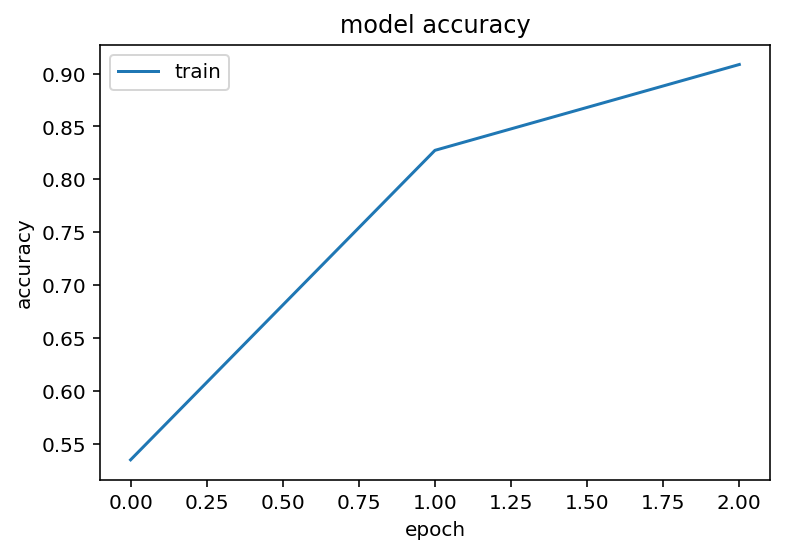

In [85]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

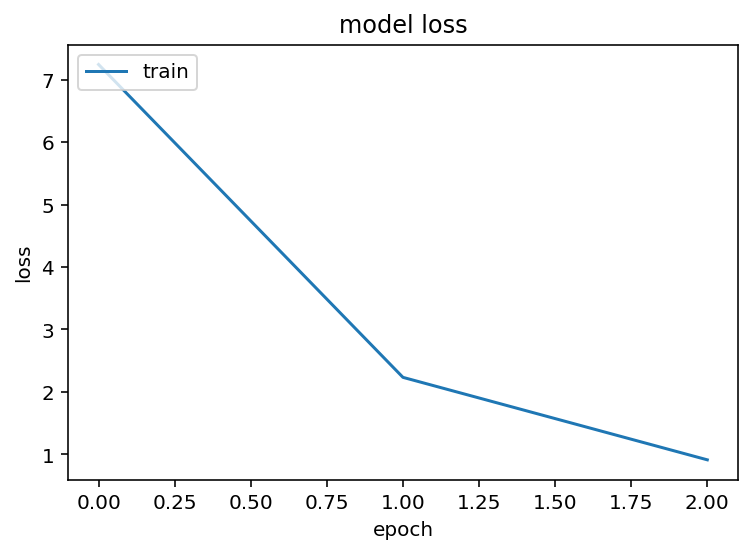

In [86]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

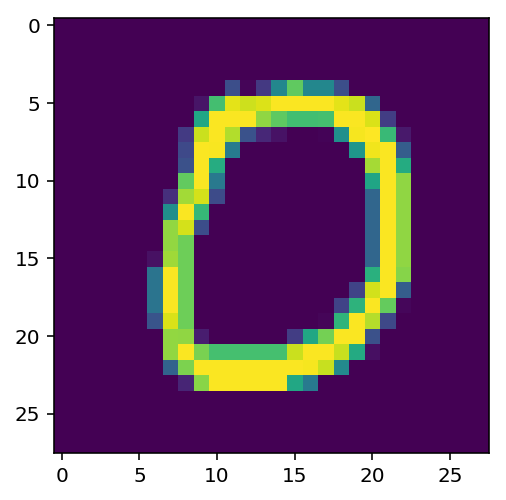

In [87]:
sample = test_x[10:11]                      #pull a case from test set
sample1 = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample1)                       #display the image


In [88]:
#sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)       #based on the pixel values, predict the number
print("Class: ",prediction)                      #print the prediction

Class:  [0]


In [89]:
#display probabilty of each possible number
(model.predict(sample))

array([[9.9998236e-01, 3.6283852e-18, 9.7115617e-07, 3.6742060e-07,
        9.0948460e-15, 1.1777180e-09, 9.9859122e-08, 7.3769671e-12,
        1.6196222e-05, 4.8365356e-10]], dtype=float32)

<h3>Assignment 2</h3>
Try different cases! Are there numbers that are harder to classify?

Try plotting accuracy and loss for all epochs

<div style="text-align: center;"><img src="../day1/coding hive logo med with text.png" height="60" width="47" />

<div> 2019